**1. 🛠️ Ortam Hazırlığı ve Kütüphaneler**

Bu bölümde, projemiz için gerekli tüm araçları (kütüphaneleri) içe aktarırız.

In [9]:
# 1. GEREKLİ PAKETİ KURMA
# Scikit-learn ile Keras entegrasyonu için zorunludur.
!pip install scikeras

# 2. KÜTÜPHANELERİ İÇE AKTARMA

# Temel Veri İşleme ve Modelleme Kütüphaneleri
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Veri Ön İşleme ve Değerlendirme Kütüphaneleri
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from scikeras.wrappers import KerasClassifier # Hata aldığınız satır, artık çalışacak

# Görselleştirme Kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

**2. 📊 Veri Seti Yükleme ve Keşifçi Veri Analizi (EDA)**

Veriyi sadece yüklemekle kalmayıp dağılımını ve kalitesini analiz ederek Derin Öğrenme için neden ön işleme gerektiğini gösterelim.

**2.1 Veriyi URL'den Yükleme**

In [10]:
# Pima Indian Diabetes Veri Seti URL'si
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

# Sütun isimleri
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=column_names)
print("✅ Veri Seti Başarıyla İnternetten Yüklendi ve İlk 5 Satır:")
print(df.head())

✅ Veri Seti Başarıyla İnternetten Yüklendi ve İlk 5 Satır:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**2.2 Veri Seti Kalite Kontrolü (Sıfır Değerler)**

Bu veri setinde, Glukoz, Kan Basıncı, Cilt Kalınlığı, İnsülin ve BMI gibi bazı sütunlarda "0" değeri eksik veri anlamına gelebilir (çünkü bu değerler fizyolojik olarak sıfır olamaz). Bu sıfırları aykırı değer olarak inceleyelim veya ortalama/medyan ile değiştirelim.

In [11]:
# Önemli Sütunlarda "0" sayısını kontrol etme
print("\nÖnemli Sütunlarda 0 Değeri Sayısı:")
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())

# Sadece Glukoz, BloodPressure ve BMI'daki 0'ları medyan ile doldurma (Daha güvenli bir yöntem)
cols_to_replace = ['Glucose', 'BloodPressure', 'BMI']
for col in cols_to_replace:
    median_val = df[col].median()
    df[col].replace(0, median_val, inplace=True)

print("\n0 Değerleri Medyan ile Doldurulduktan Sonra Kontrol (İlk 5 Sütun):")
print((df[cols_to_replace] == 0).sum())


Önemli Sütunlarda 0 Değeri Sayısı:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

0 Değerleri Medyan ile Doldurulduktan Sonra Kontrol (İlk 5 Sütun):
Glucose          0
BloodPressure    0
BMI              0
dtype: int64


/tmp/ipython-input-2842180030.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0, median_val, inplace=True)


**2.3 Özelliklerin Dağılım Grafikleri**

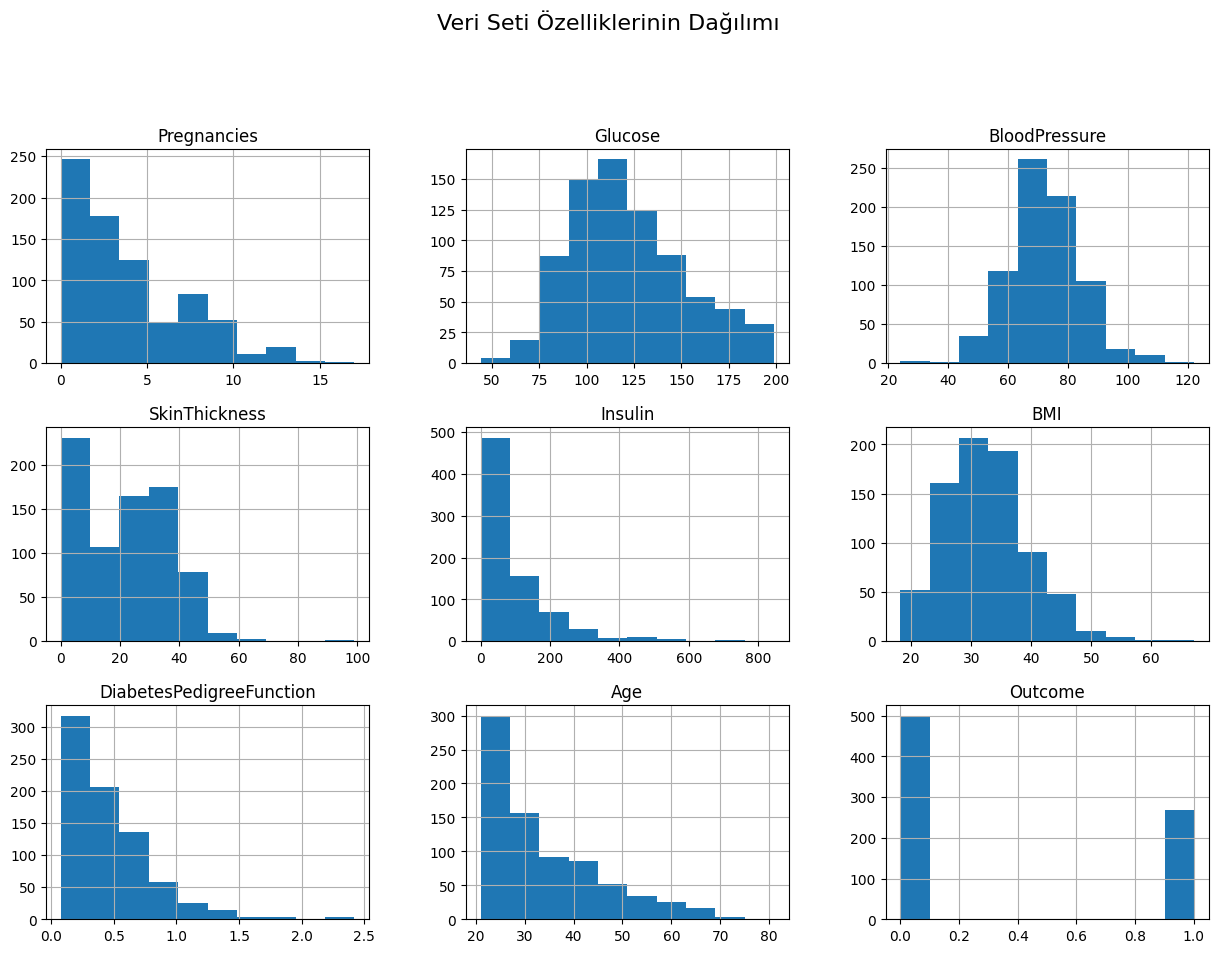

In [12]:
df.hist(figsize=(15, 10))
plt.suptitle('Veri Seti Özelliklerinin Dağılımı', y=1.02, fontsize=16)
plt.show()

**2.4 Sınıf Dağılımının İncelenmesi**

/tmp/ipython-input-1018136173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=['skyblue', 'salmon'])


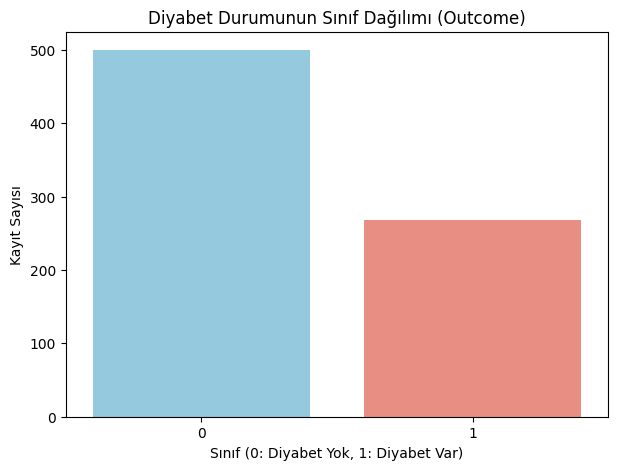


Diyabet Yok (0) Oranı: 65.10%
Diyabet Var (1) Oranı: 34.90%


In [13]:
class_counts = df['Outcome'].value_counts()
plt.figure(figsize=(7, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['skyblue', 'salmon'])
plt.title('Diyabet Durumunun Sınıf Dağılımı (Outcome)')
plt.xlabel('Sınıf (0: Diyabet Yok, 1: Diyabet Var)')
plt.ylabel('Kayıt Sayısı')
plt.show()

print(f"\nDiyabet Yok (0) Oranı: {class_counts[0] / len(df) * 100:.2f}%")
print(f"Diyabet Var (1) Oranı: {class_counts[1] / len(df) * 100:.2f}%")

**2.5 Korelasyon Matrisi Görselleştirmesi**

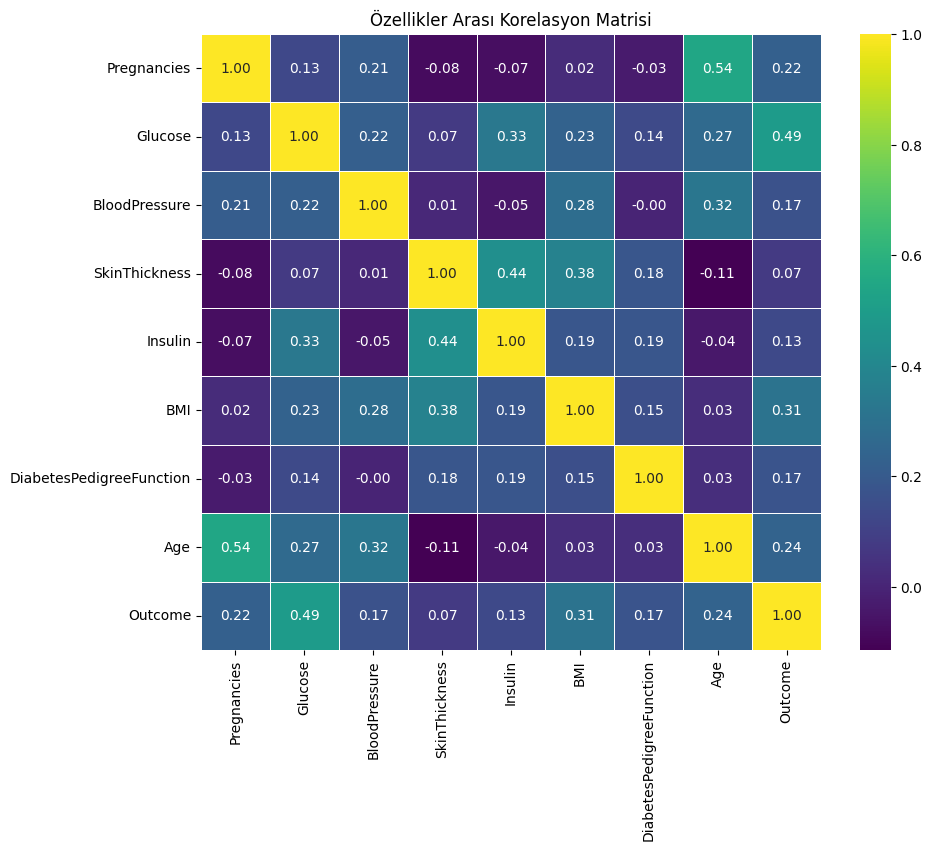

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.show()

**3. ⚙️ Veri Ön İşleme ve Hazırlık**

Veriyi standartlaştırıyor ve eğitim/test setlerine ayırıyoruz.

In [15]:
# Özellikler (X) ve Hedef Değişken (y)
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Standardizasyon (Ölçekleme)
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("\nStandardizasyon Tamamlandı.")

# Eğitim ve Test Setlerine Ayırma (Stratify ile sınıf oranları korunur)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"Eğitim veri seti boyutu: {X_train.shape}")
print(f"Test veri seti boyutu: {X_test.shape}")


Standardizasyon Tamamlandı.
Eğitim veri seti boyutu: (576, 8)
Test veri seti boyutu: (192, 8)


**4. 🧠 Derin Öğrenme Modeli Oluşturma ve Düzenlileştirme**

Overfitting'i önlemek için Dropout katmanları ve Early Stopping geri çağırması (callback) kullanıyoruz.

In [16]:
# Erken Durdurma (Callback): Overfitting'i önlemek için en iyi ağırlıkları geri yükler.
early_stopping = EarlyStopping(
    monitor='val_loss', # Doğrulama kaybını izle
    patience=20,        # 20 epoch boyunca iyileşme olmazsa durdur
    restore_best_weights=True
)

# Model Mimarisi (Dropout ile Düzenlileştirme)
model_opt = Sequential([
    # 1. Gizli Katman
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2), # %20 Dropout

    # 2. Gizli Katman
    Dense(8, activation='relu'),
    Dropout(0.2), # %20 Dropout

    # Çıkış Katmanı
    Dense(1, activation='sigmoid') # İkili sınıflandırma
])

# Modeli Derleme (Compile)
model_opt.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

print("\nModel Mimarisi Özeti:")
model_opt.summary()

# Modeli Eğitme
print("\nModel Eğitimi Başlıyor (Dropout ve Early Stopping Aktif)...")
history_opt = model_opt.fit(X_train, y_train,
                            epochs=300,
                            batch_size=32,
                            validation_split=0.15, # Doğrulama setini ayırma
                            callbacks=[early_stopping],
                            verbose=1)
print("Model Eğitimi Tamamlandı.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model Mimarisi Özeti:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)


Model Eğitimi Başlıyor (Dropout ve Early Stopping Aktif)...
Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 342ms/step - accuracy: 0.4152 - loss: 0.8026 - precision: 0.2722 - recall: 0.3435 - val_accuracy: 0.4598 - val_loss: 0.7521 - val_precision: 0.2424 - val_recall: 0.2667
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4205 - loss: 0.7717 - precision: 0.2377 - recall: 0.2970 - val_accuracy: 0.5287 - val_loss: 0.7147 - val_precision: 0.2609 - val_recall: 0.2000
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5742 - loss: 0.7165 - precision: 0.3584 - recall: 0.3508 - val_accuracy: 0.5977 - val_loss: 0.6936 - val_precision: 0.3529 - val_recall: 0.2000
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5633 - loss: 0.6933 - precision: 0.3501 - recall: 0.2251 - val_accuracy: 0.6667 - val_loss: 0.6771 - val_precision: 0.5385 - val_recall: 0.2333
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6341 - loss: 0.6775 - precision: 0.

**5. 📉 Model Performans Grafikleri ve Detaylı Analiz (Mevcut Model)**

Modelin eğitim geçmişini (history_opt) kullanarak grafikler çiziyoruz ve test seti üzerinde detaylı metrikleri hesaplıyoruz.



**5.1 Eğitim Kaybı ve Doğruluğu Grafikleri 📈**

Amaç: Modelin eğitim sırasında nasıl öğrendiğini, ne zaman stabilize olduğunu ve aşırı öğrenme eğilimi gösterip göstermediğini görselleştirmek.

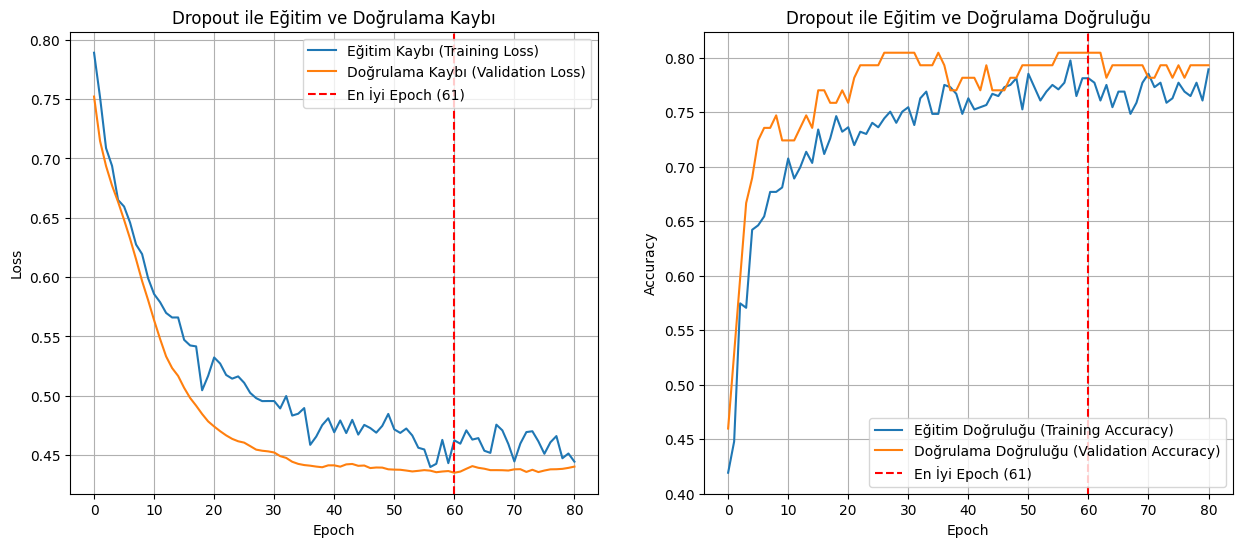

In [17]:
# Grafikler için bir fonksiyon tanımlayalım
def plot_opt_history(history):
    plt.figure(figsize=(15, 6))

    # Kayıp (Loss) Grafiği
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Eğitim Kaybı (Training Loss)')
    plt.plot(history.history['val_loss'], label='Doğrulama Kaybı (Validation Loss)')

    # Early Stopping'in çalıştığı en iyi noktayı işaretleme
    best_epoch = np.argmin(history.history['val_loss'])
    plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'En İyi Epoch ({best_epoch+1})')

    plt.title('Dropout ile Eğitim ve Doğrulama Kaybı')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Doğruluk (Accuracy) Grafiği
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu (Training Accuracy)')
    plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu (Validation Accuracy)')

    plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'En İyi Epoch ({best_epoch+1})')

    plt.title('Dropout ile Eğitim ve Doğrulama Doğruluğu')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.show()

plot_opt_history(history_opt)

**5.2 Test Seti Değerlendirmesi ve Rapor 📊**

Modeli test verisi üzerinde değerlendirip performans metriklerini yazdırıyoruz.

In [18]:
# Modeli Test Seti Üzerinde Değerlendirme
print("\nDropout'lu Modelin Test Seti Değerlendirmesi:")
# evaluate metodu, compile aşamasında tanımlanan tüm metrikleri döndürür
results = model_opt.evaluate(X_test, y_test, verbose=0)

loss_opt = results[0]
accuracy_opt = results[1]
precision_opt = results[2]
recall_opt = results[3]

print(f"Test Kaybı (Loss): {loss_opt:.4f}")
print(f"Test Doğruluğu (Accuracy): {accuracy_opt*100:.2f}%")
print(f"Test Kesinliği (Precision): {precision_opt*100:.2f}%")
print(f"Test Duyarlılığı (Recall): {recall_opt*100:.2f}%")

# Tahminler yapma (Olasılık ve İkili Sınıf)
y_pred_proba_opt = model_opt.predict(X_test)
y_pred_opt = (y_pred_proba_opt > 0.5).astype(int)

# Sınıflandırma Raporu (Precision, Recall, F1-Score)
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_opt, target_names=['Diyabet Yok (0)', 'Diyabet Var (1)']))


Dropout'lu Modelin Test Seti Değerlendirmesi:
Test Kaybı (Loss): 0.4934
Test Doğruluğu (Accuracy): 72.92%
Test Kesinliği (Precision): 61.90%
Test Duyarlılığı (Recall): 58.21%
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

Sınıflandırma Raporu:
                 precision    recall  f1-score   support

Diyabet Yok (0)       0.78      0.81      0.80       125
Diyabet Var (1)       0.62      0.58      0.60        67

       accuracy                           0.73       192
      macro avg       0.70      0.70      0.70       192
   weighted avg       0.73      0.73      0.73       192



**5.3 Karışıklık Matrisi (Confusion Matrix) 🔢**

Amaç: Modelin hangi sınıfları doğru (TN, TP) ve hangi sınıfları yanlış (FP, FN) tahmin ettiğini açıkça görselleştirmek.

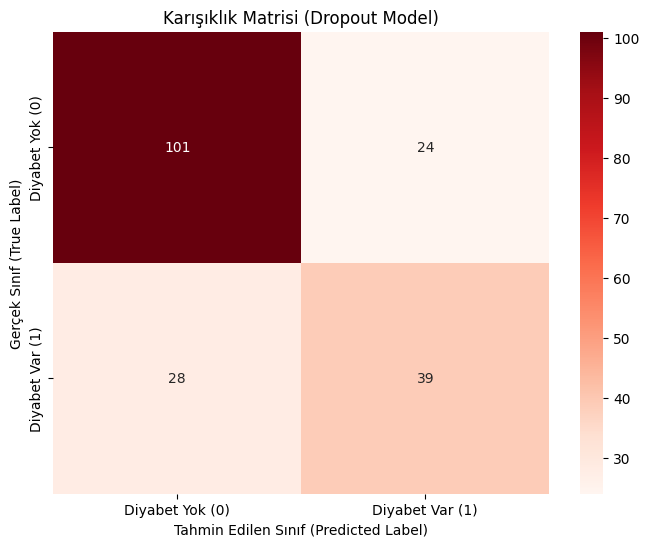

In [19]:
cm = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Diyabet Yok (0)', 'Diyabet Var (1)'],
            yticklabels=['Diyabet Yok (0)', 'Diyabet Var (1)'])
plt.title('Karışıklık Matrisi (Dropout Model)')
plt.ylabel('Gerçek Sınıf (True Label)')
plt.xlabel('Tahmin Edilen Sınıf (Predicted Label)')
plt.show()

**5.4 ROC Eğrisi ve AUC Değeri 🌟**

Amaç: Modelin sınıflandırma eşiği değiştikçe performansının ne kadar iyi olduğunu görmek ve AUC (Eğri Altındaki Alan) değeri ile modelin genel ayrım gücünü tek bir sayı ile özetlemek.

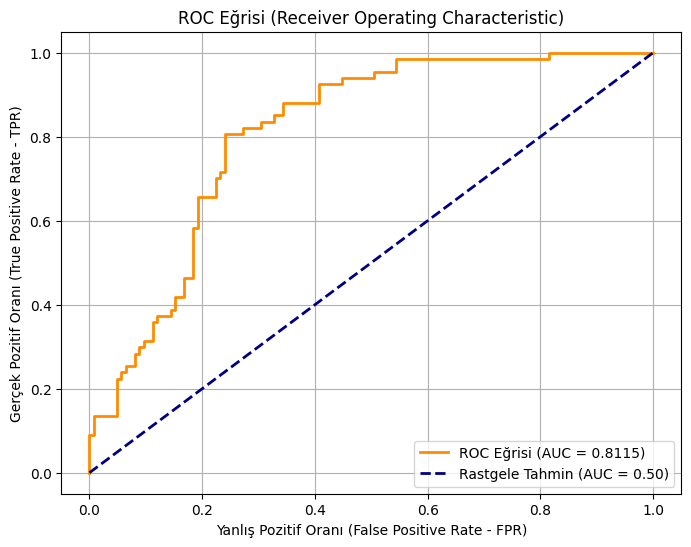

In [20]:
# ROC Eğrisi Hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_opt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Rastgele Tahmin (AUC = 0.50)')
plt.title('ROC Eğrisi (Receiver Operating Characteristic)')
plt.xlabel('Yanlış Pozitif Oranı (False Positive Rate - FPR)')
plt.ylabel('Gerçek Pozitif Oranı (True Positive Rate - TPR)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**6. 🛠️ L2 Düzenlileştirme ile İyileştirme**

Bu iyileştirmede, katmanlardaki büyük ağırlıkların toplamını maliyet fonksiyonuna ekleyen L2 Düzenlileştirme (kernel_regularizer=l2(lambda)) kullanacağız. Ayrıca, başarılı olduğu kanıtlanan Dropout ve Early Stopping tekniklerini koruyacağız.

**6.1 Yeni Model Mimarisi: L2 Düzenlileştirme Eklendi**

In [21]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping # << Düzeltme burada!

# L2 düzenlileştirme faktörü (Lambda değeri)
l2_lambda = 0.001

# Erken Durdurma ve Learning Rate Scheduler callback'lerini tekrar tanımlıyoruz
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=0)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001, verbose=0)
callbacks_list_l2 = [early_stopping, lr_scheduler]


# Model Mimarisi (Dropout ve L2 ile Düzenlileştirme)
model_l2 = Sequential([
    # 1. Katman: 16 Nöron ve L2 Düzenlileştirme
    Dense(16, activation='relu', kernel_regularizer=l2(l2_lambda), input_shape=(X_train.shape[1],)),
    Dropout(0.2),

    # 2. Katman: 8 Nöron ve L2 Düzenlileştirme
    Dense(8, activation='relu', kernel_regularizer=l2(l2_lambda)),
    Dropout(0.2),

    # Çıkış Katmanı
    Dense(1, activation='sigmoid')
])

# Modeli Derleme (Compile)
model_l2.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

print("\nL2 Düzenlileştirme ile Model Eğitimi Başlıyor...")
history_l2 = model_l2.fit(X_train, y_train,
                            epochs=300,
                            batch_size=32,
                            validation_split=0.15,
                            callbacks=callbacks_list_l2,
                            verbose=1)
print("Model Eğitimi Tamamlandı.")


L2 Düzenlileştirme ile Model Eğitimi Başlıyor...
Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - accuracy: 0.3831 - loss: 0.8007 - precision_1: 0.2662 - recall_1: 0.4635 - val_accuracy: 0.4138 - val_loss: 0.7507 - val_precision_1: 0.3158 - val_recall_1: 0.6000 - learning_rate: 0.0010
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4488 - loss: 0.7718 - precision_1: 0.3093 - recall_1: 0.3882 - val_accuracy: 0.4713 - val_loss: 0.7223 - val_precision_1: 0.3182 - val_recall_1: 0.4667 - learning_rate: 0.0010
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5149 - loss: 0.7357 - precision_1: 0.3518 - recall_1: 0.5169 - val_accuracy: 0.5517 - val_loss: 0.6991 - val_precision_1: 0.3448 - val_recall_1: 0.3333 - learning_rate: 0.0010
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5313 - loss: 0.7206 - precision_1: 0.3642 - recall_1: 0.3800 - val_accuracy: 0.6897 - val_loss: 0.6790 - val_precision_1: 0.5714 - val_recall_1: 0.4000 - learning_rate: 0.0010
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/

**7. 📉 L2 Düzenlileştirme Modelinin Detaylı Analizi**

**7.1 Test Seti Metrikleri ve Sınıflandırma Raporu**

Öncelikle, L2 Düzenlileştirme uygulanan modelin performans sonuçlarını alalım.

In [22]:
# Test seti üzerinde değerlendirme
print("\n--- L2 DÜZENLİLEŞTİRME MODELİNİN DETAYLI TEST RAPORU ---")
results_l2 = model_l2.evaluate(X_test, y_test, verbose=0)

loss_l2, accuracy_l2, precision_l2, recall_l2 = results_l2[0], results_l2[1], results_l2[2], results_l2[3]

print(f"Test Doğruluğu (Accuracy): {accuracy_l2*100:.2f}%")
print(f"Test Kesinliği (Precision): {precision_l2*100:.2f}%")
print(f"Test Duyarlılığı (Recall): {recall_l2*100:.2f}%")

# Tahminler yapma
y_pred_proba_l2 = model_l2.predict(X_test)
y_pred_l2 = (y_pred_proba_l2 > 0.5).astype(int)

# Sınıflandırma Raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_l2, target_names=['Diyabet Yok (0)', 'Diyabet Var (1)']))


--- L2 DÜZENLİLEŞTİRME MODELİNİN DETAYLI TEST RAPORU ---
Test Doğruluğu (Accuracy): 72.40%
Test Kesinliği (Precision): 61.67%
Test Duyarlılığı (Recall): 55.22%
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  

Sınıflandırma Raporu:
                 precision    recall  f1-score   support

Diyabet Yok (0)       0.77      0.82      0.79       125
Diyabet Var (1)       0.62      0.55      0.58        67

       accuracy                           0.72       192
      macro avg       0.69      0.68      0.69       192
   weighted avg       0.72      0.72      0.72       192



**7.2 Karışıklık Matrisi (Heatmap)**

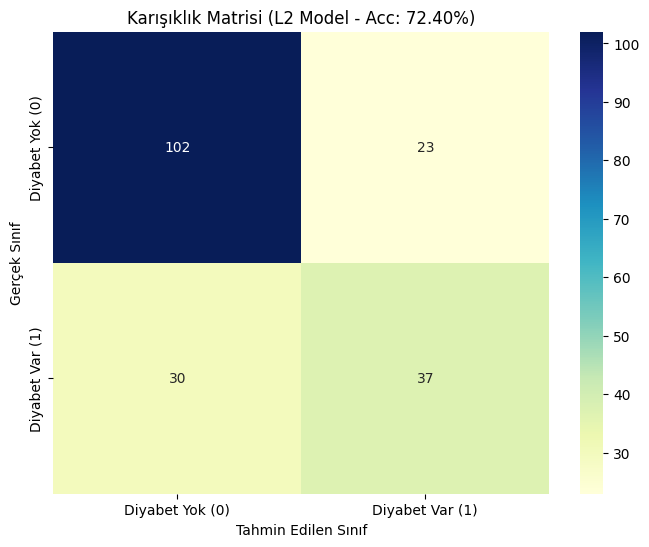

In [23]:
cm_l2 = confusion_matrix(y_test, y_pred_l2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_l2, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Diyabet Yok (0)', 'Diyabet Var (1)'],
            yticklabels=['Diyabet Yok (0)', 'Diyabet Var (1)'])
plt.title(f'Karışıklık Matrisi (L2 Model - Acc: {accuracy_l2*100:.2f}%)')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.show()

**7.3 ROC Eğrisi ve AUC Değeri**

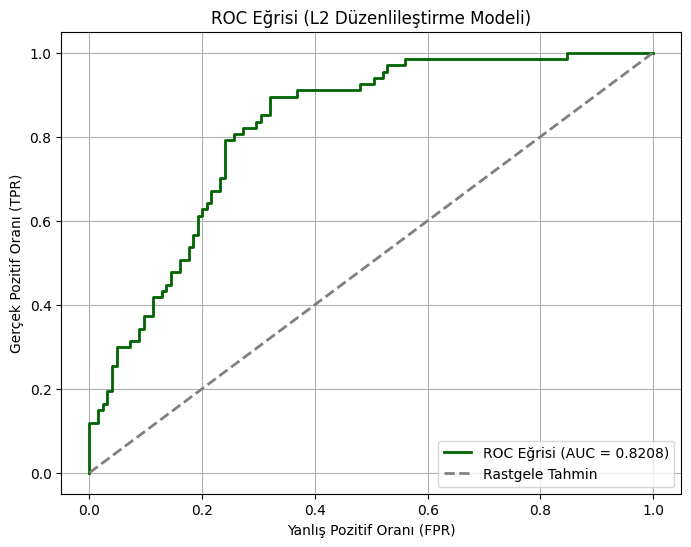

In [24]:
fpr_l2, tpr_l2, thresholds_l2 = roc_curve(y_test, y_pred_proba_l2)
roc_auc_l2 = auc(fpr_l2, tpr_l2)

plt.figure(figsize=(8, 6))
plt.plot(fpr_l2, tpr_l2, color='darkgreen', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc_l2:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Rastgele Tahmin')
plt.title('ROC Eğrisi (L2 Düzenlileştirme Modeli)')
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Gerçek Pozitif Oranı (TPR)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**8.🛠️ Grid Search Hiperparametre Optimizasyonu**

In [25]:
# Gerekli paketi kurma komutu
!pip install scikeras

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import random
import numpy as np

# Keras modelini oluşturan fonksiyon
def create_model_gs(neurons=12, optimizer='adam'):
    # Dropout %20 ile model mimarisi
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(int(neurons/2), activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Optimizatör Tanımlama
    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'rmsprop':
        opt = RMSprop()
    else:
        opt = Adam()

    # Modeli Derleme: Sözdizimi kontrol edildi
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Denenecek hiperparametre seçenekleri
neuron_options = [8, 16]
batch_options = [16, 32]
lr_options = [0.005, 0.001]

NUM_TRIALS = 8
best_accuracy = 0.0
best_params = {}

# Callback'ler
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=0)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001, verbose=0)
callbacks_list = [early_stopping, lr_scheduler]

print(f"\nToplam {NUM_TRIALS} Farklı Model Kombinasyonu Deneniyor (Manuel Rastgele Arama)...")

for i in range(1, NUM_TRIALS + 1):
    # Rastgele Parametre Seçimi
    neurons = random.choice(neuron_options)
    batch_size = random.choice(batch_options)
    learning_rate = random.choice(lr_options)

    # Modeli Oluşturma (Optimizer 'adam' olarak sabit tutulur, LR değeri denge için değiştirilir)
    model = create_model_gs(neurons=neurons, optimizer='adam')

    # Yeni Learning Rate ile tekrar derleme
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Modeli Eğitme: Sözdizimi kontrol edildi
    history = model.fit(X_train, y_train,
                        epochs=300,
                        batch_size=batch_size,
                        validation_split=0.15,
                        callbacks=callbacks_list,
                        verbose=0)

    # Modeli Test Seti Üzerinde Değerlendirme
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    print(f"Deneme {i} - Params: N={neurons}, B={batch_size}, LR={learning_rate:.4f} -> Acc: {accuracy*100:.2f}%")

    # En iyi modeli kaydetme
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_params = {
            'neurons': neurons,
            'batch_size': batch_size,
            'learning_rate': learning_rate
        }

print("\nManuel Optimizasyon Tamamlandı.")
print(f"\n🏆 EN İYİ MODEL PERFORMANSI: {best_accuracy*100:.2f}% Doğruluk")
print(f"   Parametreler: {best_params}")


Toplam 8 Farklı Model Kombinasyonu Deneniyor (Manuel Rastgele Arama)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Deneme 1 - Params: N=8, B=16, LR=0.0010 -> Acc: 72.92%
Deneme 2 - Params: N=8, B=16, LR=0.0010 -> Acc: 71.88%
Deneme 3 - Params: N=8, B=16, LR=0.0010 -> Acc: 71.88%
Deneme 4 - Params: N=8, B=32, LR=0.0050 -> Acc: 73.44%
Deneme 5 - Params: N=8, B=32, LR=0.0050 -> Acc: 72.40%
Deneme 6 - Params: N=8, B=32, LR=0.0010 -> Acc: 74.48%
Deneme 7 - Params: N=8, B=16, LR=0.0050 -> Acc: 70.83%
Deneme 8 - Params: N=16, B=16, LR=0.0010 -> Acc: 72.40%

Manuel Optimizasyon Tamamlandı.

🏆 EN İYİ MODEL PERFORMANSI: 74.48% Doğruluk
   Parametreler: {'neurons': 8, 'batch_size': 32, 'learning_rate': 0.001}
